In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime as dt
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import matplotlib.pyplot as plt
import csv
df_1= pd.read_csv('Coinbase/coinbase_Part1.csv')
df_2 = pd.read_csv('Coinbase/coinbase_Part2.csv')
frames = [df_1, df_2]
df = pd.concat(frames, ignore_index=True)

In [2]:
df_1= pd.read_csv('Coinbase/coinbase_Part1.csv')
df_2 = pd.read_csv('Coinbase/coinbase_Part2.csv')
frames = [df_1, df_2]
df = pd.concat(frames, ignore_index=True)

In [3]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.Timestamp = df.Timestamp.dt.tz_localize('UTC')

In [4]:
del df_1, df_2
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time
del df['Timestamp'] #Delete original datetime column

In [5]:
df.head()
df['Hour'] = df.Time.apply(lambda x : x.hour)
df['Minute'] = df.Time.apply(lambda x : x.minute)

In [6]:
price3pmDF = df[(df.Hour == 15) & (df.Minute == 0)][['Date', 'Close']]
price3pmDF.rename({'Close':'price'}, axis=1, inplace=True)
price3pmDF.set_index('Date', inplace=True)
price3pmDF.head()

,price
Date,
2014-12-01,370.00
2014-12-02,378.00
2014-12-03,378.00
2015-01-08,289.25
2015-01-13,260.00


In [25]:
startDate = datetime.date(dt.datetime.strptime('01/23/18', '%x'))
endDate = datetime.date(dt.datetime.strptime('03/27/18', '%x'))

In [26]:

def computePriceDF (inputDF_, windowsize):
    inputDF_['priceMean'] = inputDF_.price.rolling(windowsize).mean() 
    inputDF_['priceSD'] = inputDF_.price.rolling(windowsize).std()
    inputDF_['priceDiff'] = inputDF_.price.diff() / inputDF_.price.shift(1)
    inputDF_['diffMean'] = inputDF_.priceDiff.rolling(windowsize).mean()
    inputDF_['diffSD'] = inputDF_.priceDiff.rolling(windowsize).std()
    inputDF_ = inputDF_.loc[startDate : endDate]
    return {'pricePosiDate':inputDF_[inputDF_.price - inputDF_.priceMean > 2 * inputDF_.priceSD].index,
           'priceNegeDate': inputDF_[inputDF_.price - inputDF_.priceMean < -2 * inputDF_.priceSD].index,
           'priceDiffPosiDate': inputDF_[inputDF_.priceDiff - inputDF_.diffMean > 2 * inputDF_.diffSD].index,
           'priceDiffNegeDate':inputDF_[inputDF_.priceDiff - inputDF_.diffMean < -2 * inputDF_.diffSD].index}

In [27]:
for ws in [30, 45, 60, 75, 90]:
    #wsDF = 
    print ("for windowsize of %i:"%ws)
    print (computePriceDF (price3pmDF, ws))
    print ("==========================================")

for windowsize of 30:
{'pricePosiDate': Index([], dtype='object', name='Date'), 'priceNegeDate': Index([2018-02-05, 2018-03-15, 2018-03-17, 2018-03-18], dtype='object', name='Date'), 'priceDiffPosiDate': Index([2018-03-19], dtype='object', name='Date'), 'priceDiffNegeDate': Index([], dtype='object', name='Date')}
for windowsize of 45:
{'pricePosiDate': Index([], dtype='object', name='Date'), 'priceNegeDate': Index([2018-02-02, 2018-02-05, 2018-02-06], dtype='object', name='Date'), 'priceDiffPosiDate': Index([2018-03-19], dtype='object', name='Date'), 'priceDiffNegeDate': Index([], dtype='object', name='Date')}
for windowsize of 60:
{'pricePosiDate': Index([], dtype='object', name='Date'), 'priceNegeDate': Index([2018-02-02, 2018-02-05, 2018-02-06], dtype='object', name='Date'), 'priceDiffPosiDate': Index([2018-03-19], dtype='object', name='Date'), 'priceDiffNegeDate': Index([], dtype='object', name='Date')}
for windowsize of 75:
{'pricePosiDate': Index([], dtype='object', name='Date'),

# Ignore Below

In [37]:
windowsize = 45
priceDF = pd.DataFrame(df.groupby('Date')['Close'].mean())
priceDF.rename({'Close':'price'}, axis=1, inplace=True)
priceDF['priceMean'] = priceDF.price.rolling(windowsize).mean() 
priceDF['priceSD'] = priceDF.price.rolling(windowsize).std()
priceDF['priceDiff'] = priceDF.price.diff() / priceDF.price.shift(1)
priceDF['diffMean'] = priceDF.priceDiff.rolling(windowsize).mean()
priceDF['diffSD'] = priceDF.priceDiff.rolling(windowsize).std()

In [148]:
priceDF = priceDF.loc[startDate : endDate]

In [152]:
priceDF[priceDF.price - priceDF.priceMean < - 2 * priceDF.priceSD]

,price,priceMean,priceSD,priceDiff,diffMean,diffSD
Date,,,,,,
2018-02-02,8547.647486,13214.135836,2098.914960,-0.100018,-0.015220,0.057840
2018-02-05,7613.970403,12728.229458,2283.918453,-0.128501,-0.011722,0.056427
2018-02-06,6807.273597,12543.876577,2418.698749,-0.105950,-0.015975,0.056149


In [145]:
priceDF.price - priceDF.price.rolling(windowsize).mean() >  \
        2 * priceDF.price.rolling(windowsize).std()

Date
2018-01-24    False
2018-01-25    False
2018-01-26    False
2018-01-27    False
2018-01-28    False
2018-01-29    False
2018-01-30    False
2018-01-31    False
2018-02-01    False
2018-02-02    False
2018-02-03    False
2018-02-04    False
2018-02-05    False
2018-02-06    False
2018-02-07    False
2018-02-08    False
2018-02-09    False
2018-02-10    False
2018-02-11    False
2018-02-12    False
2018-02-13    False
2018-02-14    False
2018-02-15    False
2018-02-16    False
2018-02-17    False
2018-02-18    False
2018-02-19    False
2018-02-20    False
2018-02-21    False
2018-02-22    False
              ...  
2018-02-26    False
2018-02-27    False
2018-02-28    False
2018-03-01    False
2018-03-02    False
2018-03-03    False
2018-03-04    False
2018-03-05    False
2018-03-06    False
2018-03-07    False
2018-03-08    False
2018-03-09    False
2018-03-10    False
2018-03-11    False
2018-03-12    False
2018-03-13    False
2018-03-14    False
2018-03-15    False
2018-03-16    F

In [159]:
df_ = df
minPeriod = 43200
df_['Average'] = df_.Close.rolling(minPeriod).mean()
df_['Volatility']=df_.Close.rolling(minPeriod).std() * np.sqrt(minPeriod) 
df_['SD']=df_.Close.rolling(minPeriod).std()
index_1 = df_[df_.Date == datetime.date(dt.datetime.strptime('01/23/18', '%x'))].index[0]
index_2 = df_[df_.Date == datetime.date(dt.datetime.strptime('03/27/18', '%x'))].index[0]
df_4=df_.loc[index_1:index_2].groupby(df_.loc[index_1:index_2].Date).mean()

In [161]:
df_

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
0,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,2014-12-01,05:33:00+00:00,NaN,NaN,NaN
1,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,2014-12-01,05:34:00+00:00,NaN,NaN,NaN
2,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,2014-12-01,05:35:00+00:00,NaN,NaN,NaN
3,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,2014-12-01,05:36:00+00:00,NaN,NaN,NaN
4,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,2014-12-01,05:37:00+00:00,NaN,NaN,NaN
5,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,2014-12-01,05:38:00+00:00,NaN,NaN,NaN
6,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,2014-12-01,05:39:00+00:00,NaN,NaN,NaN
7,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,2014-12-01,05:40:00+00:00,NaN,NaN,NaN
8,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,2014-12-01,05:41:00+00:00,NaN,NaN,NaN
9,300.00,300.00,300.00,300.00,0.010000,3.000000e+00,300.000000,2014-12-01,05:42:00+00:00,NaN,NaN,NaN


In [154]:

def markDate(minPeriod):
    df_ = df
    df_['Average'] = df_.Close.rolling(minPeriod).mean()
    df_['Volatility']=df_.Close.rolling(minPeriod).std() * np.sqrt(minPeriod) 
    df_['SD']=df_.Close.rolling(minPeriod).std()
    index_1 = df_[df_.Date == datetime.date(dt.datetime.strptime('01/23/18', '%x'))].index[0]
    index_2 = df_[df_.Date == datetime.date(dt.datetime.strptime('03/27/18', '%x'))].index[0]
    df_4=df_.loc[index_1:index_2].groupby(df_.loc[index_1:index_2].Date).mean()
    markerPosi = []
    markerNega = []
    avechange=[]
    sdchange=[]
    for i in range(len(df_4)-1):
        avediff=(df_4['Average'].iloc[i+1]-df_4['Average'].iloc[i])/df_4['Average'].iloc[i]
        sddiff=(df_4['SD'].iloc[i+1]-df_4['SD'].iloc[i])/df_4['SD'].iloc[i]
        avechange.append(avediff)
        sdchange.append(sddiff)
        if avechange[i] > 2*(sdchange[i]):
            markerPosi.append(df_4.index[i])
        if avechange[i] < -2*(sdchange[i]):
            markerNega.append(df_4.index[i])
    plt.figure(figsize=(10,5))
    plt.plot(df_.loc[index_1:index_2].Date,df_.loc[index_1:index_2].Weighted_Price, linewidth=2.4)
    plt.plot(df_4.index,df_4.Weighted_Price,c='black', linewidth=2.4)
    print ("there are %i date marked as Posi."%len(markerPosi))
    print ("there are %i date marked as Nega."%len(markerNega))
    for xc in markerNega:
        plt.axvline(x=xc,c='r')
    for xc in markerPosi:
        plt.axvline(x=xc, c = 'g')
    plt.show()
    return {'markerPosi': pd.DataFrame({'markerPosiDate':markerPosi}), 
            'markerNega': pd.DataFrame({'markerPosiDate':markerNega})}

In [ ]:
MACD1 = markDate(minPeriod=43200*2)

there are 34 date marked as Posi.
there are 38 date marked as Nega.


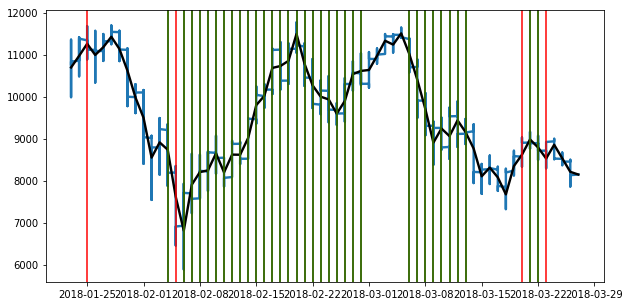

there are 47 date marked as Posi.
there are 50 date marked as Nega.


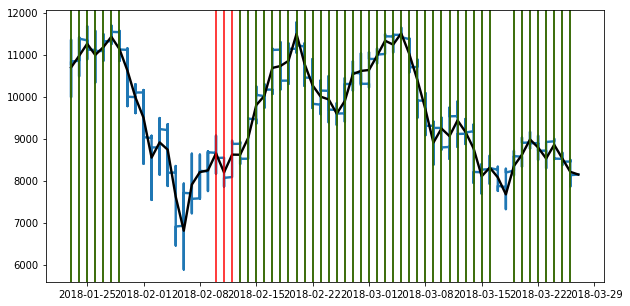

there are 63 date marked as Posi.
there are 57 date marked as Nega.


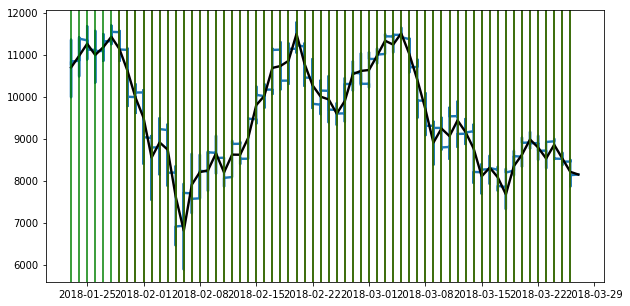

there are 63 date marked as Posi.
there are 16 date marked as Nega.


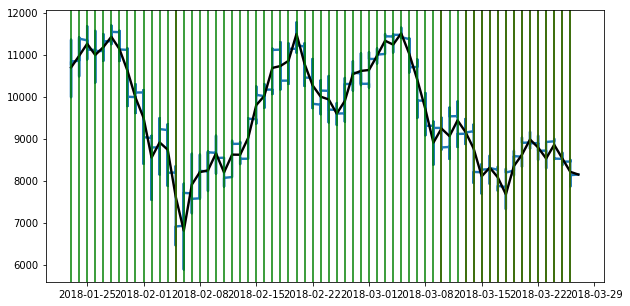

In [18]:
MACD0 = markDate(minPeriod=43200)
MACD0['markerPosi'].to_csv('MACD0markerPosi.csv')
MACD0['markerNega'].to_csv('MACD0markerNega.csv')
MACD1 = markDate(minPeriod=43200*2)
MACD1['markerPosi'].to_csv('MACD1markerPosi.csv')
MACD1['markerNega'].to_csv('MACD1markerNega.csv')
MACD3 = markDate(minPeriod=43200*2*3)
MACD3['markerPosi'].to_csv('MACD3markerPosi.csv')
MACD3['markerNega'].to_csv('MACD3markerNega.csv')
MACD5 = markDate(minPeriod=43200*2*5)
MACD5['markerPosi'].to_csv('MACD5markerPosi.csv')
MACD5['markerNega'].to_csv('MACD5markerNega.csv')

In [32]:
for macd in [MACD1, MACD3, MACD5]:
    print ("mark positive date:%i: "%len(macd['markerPosi']))
    print ("mark megative date:%i: "%len(macd['markerNega']))

mark positive date:47: 
mark megative date:50: 
mark positive date:63: 
mark megative date:57: 
mark positive date:63: 
mark megative date:16: 


In [7]:
price=df['Close']
min_periods = 43200

# Calculate the sd and volatility
mean=price.rolling(min_periods).mean()
sd=price.rolling(min_periods).std()
vol = price.rolling(min_periods).std() * np.sqrt(min_periods) 
df['Average']=mean
df['Volatility']=vol
df['SD']=sd
df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
1819070,6064.03,6080.00,6064.03,6080.00,10.561973,64148.832294,6073.564990,2018-06-26,23:56:00+00:00,6950.466007,116102.541286,558.598612
1819071,6080.00,6080.00,6071.52,6077.99,0.682001,4145.298155,6078.136687,2018-06-26,23:57:00+00:00,6950.436759,116105.160854,558.611216
1819072,6078.00,6081.00,6077.99,6081.00,5.710185,34708.629492,6078.372515,2018-06-26,23:58:00+00:00,6950.407581,116107.757433,558.623708
1819073,6081.00,6085.70,6074.00,6074.00,20.892658,127050.449960,6081.105271,2018-06-26,23:59:00+00:00,6950.378122,116110.388868,558.636369
1819074,6074.01,6074.01,6071.52,6071.53,33.898112,205896.111310,6073.969960,2018-06-27,00:00:00+00:00,6950.348583,116113.035307,558.649102


In [7]:
index_1 = df[df.Date == datetime.date(dt.datetime.strptime('01/23/18', '%x'))].index[0]
index_2 = df[df.Date == datetime.date(dt.datetime.strptime('03/27/18', '%x'))].index[0]
df_3= df.loc[index_1:index_2]
df_3.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time
1595874,10766.70,10799.98,10766.69,10799.98,25.238525,272069.775340,10779.939584,2018-01-23,00:00:00+00:00
1595875,10799.98,10800.00,10797.23,10797.23,6.726254,72636.527088,10798.957083,2018-01-23,00:01:00+00:00
1595876,10797.24,10797.24,10789.00,10790.00,10.324661,111401.734660,10789.868923,2018-01-23,00:02:00+00:00
1595877,10790.00,10790.00,10725.78,10732.90,35.167564,378147.511530,10752.735519,2018-01-23,00:03:00+00:00
1595878,10732.90,10750.00,10732.90,10750.00,8.819049,94776.923925,10746.841536,2018-01-23,00:04:00+00:00


In [8]:
df_4=df_3.groupby(df_3.Date).mean()
df_4.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Date,,,,,,,
2018-01-23,10694.957153,10707.347083,10682.436090,10694.852736,15.001166,160812.535684,10694.836727
2018-01-24,10971.984729,10980.105139,10963.683576,10972.448472,10.366352,113846.298097,10971.714961
2018-01-25,11259.428354,11265.764250,11252.426514,11259.235854,9.321376,105256.012808,11259.205322
2018-01-26,10992.639417,10999.507153,10985.075500,10992.569951,12.927589,141304.100192,10992.283702
2018-01-27,11177.254542,11182.093500,11172.314326,11177.383819,8.325551,93366.121547,11177.335040


In [41]:
marker = []
markerPosi = []
markerNega = []
avechange=[]
sdchange=[]
for i in range(len(df_4)-1):
    avediff=(df_4['Average'].iloc[i+1]-df_4['Average'].iloc[i])/df_4['Average'].iloc[i]
    sddiff=(df_4['SD'].iloc[i+1]-df_4['SD'].iloc[i])/df_4['SD'].iloc[i]
    avechange.append(avediff)
    sdchange.append(sddiff)
#    if abs(avechange[i]) > 2*(sdchange[i]):
#        marker.append(df_4.index[i])
    if avechange[i] > 2*(sdchange[i]):
        markerPosi.append(df_4.index[i])
    if avechange[i] < -2*(sdchange[i]):
        markerNega.append(df_4.index[i])

2
12
12
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
56
57
57
58
58
59


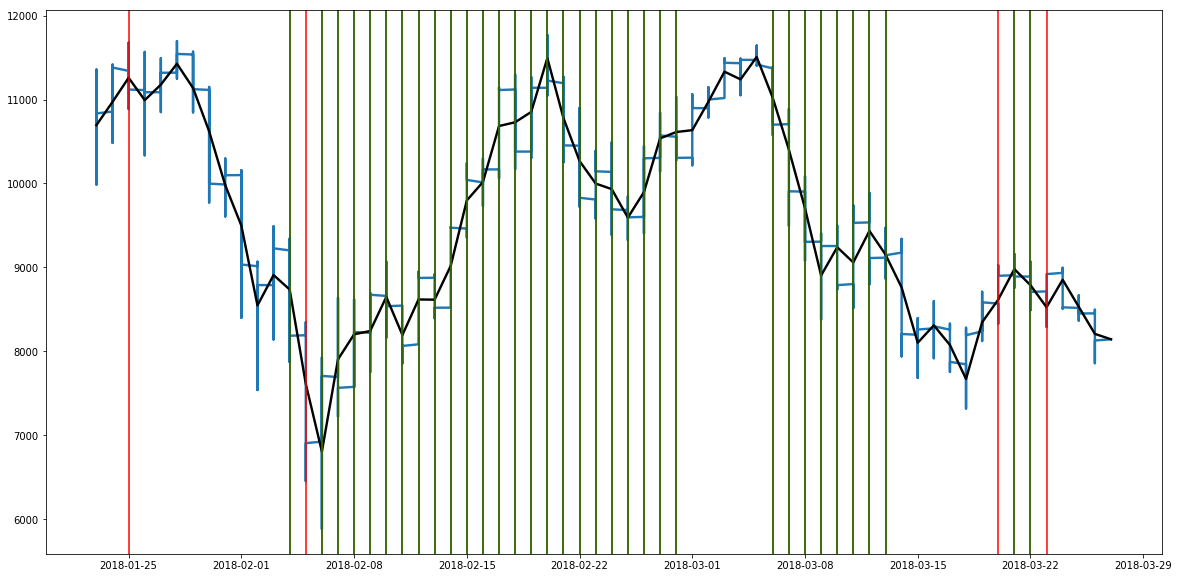

In [47]:
plt.figure(figsize=(20,10))
plt.plot(df_3.Date,df_3.Weighted_Price, linewidth=2.4)
plt.plot(df_4.index,df_4.Weighted_Price,c='black', linewidth=2.4)
for xc in markerNega:
    plt.axvline(x=xc,c='r')
for xc in markerPosi:
    plt.axvline(x=xc, c = 'g')
plt.show()

In [49]:
markerNega = pd.DataFrame({'Date':markerNega})
markerNega.to_csv('markerNega.csv',index=False)
markerPosi = pd.DataFrame({'Date':markerPosi})
markerPosi.to_csv('markerPosi.csv',index=False)